In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("graph_source_data.csv")

In [3]:
df

,Unnamed: 0,pat,entity A,entity B,apis
0,0,convert (.*) to (.*),"['a', 'string']","['an', 'int']","['java.util.Optional.ofNullable', 'java.lang.I..."
1,1,convert (.*) to (.*),"['from', 'int']",['string'],"['java.lang.Integer.toString', 'java.lang.Stri..."
2,2,convert (.*) to (.*),['integer'],['string'],"['java.lang.Integer.toString', 'java.lang.Stri..."
3,3,convert (.*) to (.*),['string'],['long'],['java.lang.Long.parseLong']
4,4,convert (.*) to (.*),"['string', 'object']","['boolean', 'object']","['java.lang.Boolean.parseBoolean', 'java.lang...."
...,...,...,...,...,...
5400,25,map (.*) in (.*),['keys'],"['main', 'string']","['java.util.regex.Matcher.quoteReplacement', '..."
5401,26,map (.*) in (.*),['map'],"['java', 'streams']",['java.util.stream.Stream.of']
5402,27,map (.*) in (.*),['size'],"['a', 'variable']",['java.util.HashMap.size']
5403,28,map (.*) in (.*),"['and', 'groupby']","['one', 'go']","['java.util.stream.Collectors.toList', 'java.u..."


In [4]:
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
  
stop_words = set(stopwords.words('english'))  

In [55]:
stop_words = list(stop_words)
stop_words += ["a","an","java"]
stop_words = set(stop_words)

import networkx as nx
G = nx.Graph()


for index, row in df.iterrows():
    relation = row["pat"].split(" ")
    verb = relation[0]+relation[2]
    
    entitiy_A = eval(row["entity A"])
    entitiy_A = [k for k in entitiy_A if k not in stop_words]
    entitiy_A = " ".join(entitiy_A)
    
    entitiy_B = eval(row["entity B"])
    entitiy_B = [k for k in entitiy_B if k not in stop_words]
    entitiy_B = " ".join(entitiy_B)
    
    api=row["apis"]

    G.add_node(entitiy_A)  
    G.add_node(entitiy_B)  
    G.add_edge(entitiy_A, entitiy_B,text=verb)



In [56]:
G.number_of_nodes()

4641

In [57]:
G.number_of_edges()

4953

In [58]:
remove = [node for node,degree in dict(G.degree()).items() if degree < 2]
G.remove_nodes_from(remove)

In [59]:
G.number_of_nodes()

1005

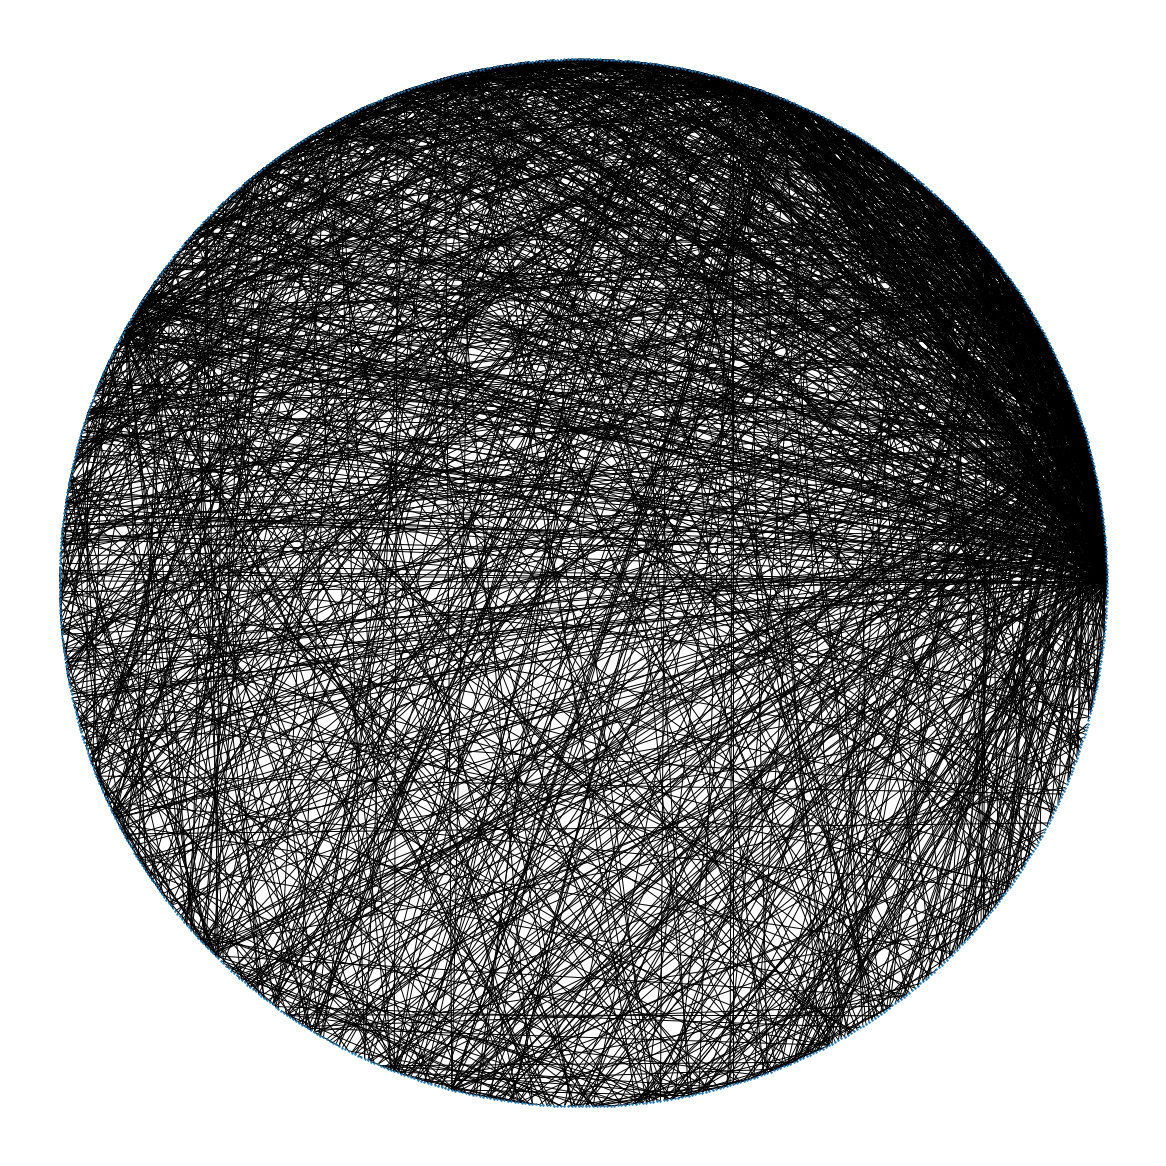

In [33]:
# nx.draw(G)
from matplotlib import pyplot as plt
plt.figure(3,figsize=(16,16)) 

# G1 = nx.generators.directed.random_k_out_graph(10, 3, 0.5)

# giant = max(nx.connected_component_subgraphs(G), key=len)

giant = max(nx.connected_components(G), key=len)


#     Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(giant)
#     nx.draw_networkx_edges(G0, pos, edge_color="r", width=6.0)


# for component in list(nx.connected_components(G)):
#     if len(component) < 16451: # Size of the largest component
#         for node in component:
#             G.remove_node(node)


# nx.draw(G0,node_size=2, pos=nx.spring_layout(G0, scale=10000000))  # use spring layout


nx.draw(G0,node_size=2, pos=nx.shell_layout(G0, scale=100000))  # use spring layout

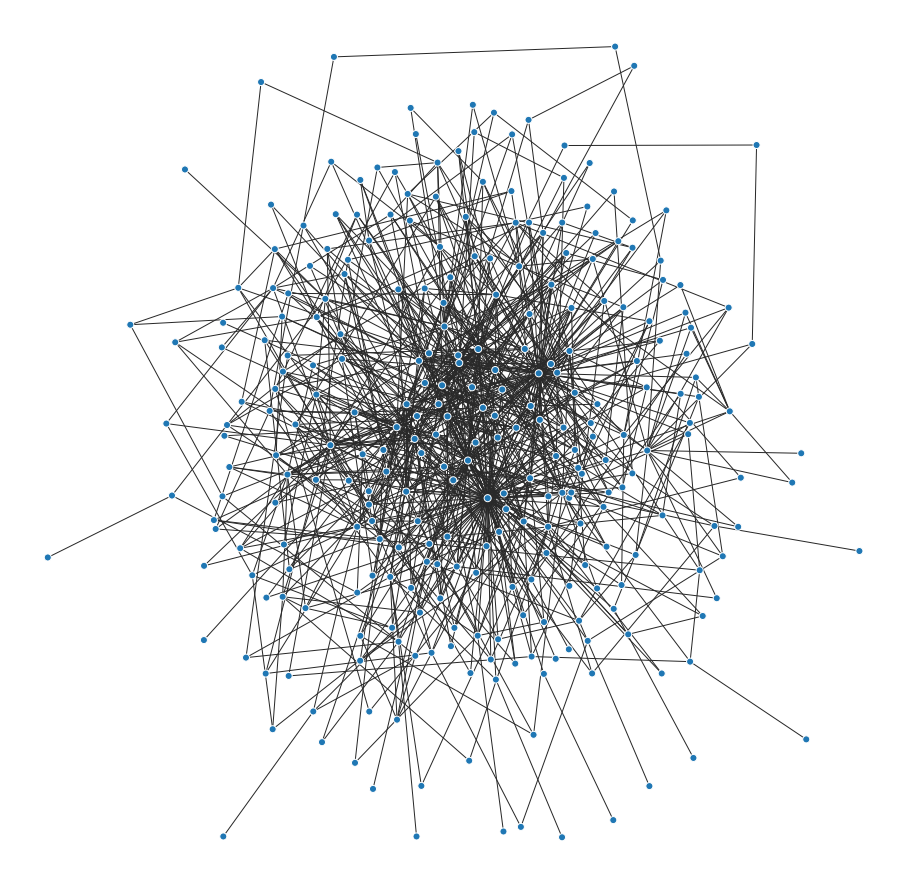

In [48]:
import networkx as nx
import matplotlib.pyplot as plt
from grave import plot_network
plt.figure(3,figsize=(16,16)) 
# Generate a networkx graph
# graph = nx.powerlaw_cluster_graph(50, 1, .2)

# Plot it
plot_network(G0,layout="kamada_kawai")
plt.show()

In [50]:
# !pip install grave

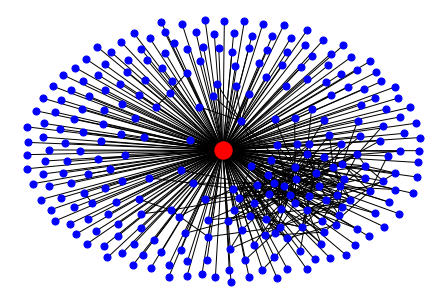

In [15]:
from operator import itemgetter

import matplotlib.pyplot as plt
import networkx as nx

# find node with largest degree
node_and_degree = G.degree()
(largest_hub, degree) = sorted(node_and_degree, key=itemgetter(1))[-1]

# Create ego graph of main hub
hub_ego = nx.ego_graph(G, largest_hub)

# Draw graph
pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color="b", node_size=50, with_labels=False)

# Draw ego as large and red
options = {"node_size": 300, "node_color": "r"}
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[largest_hub], **options)
plt.show()

{'string': array([0.46762623, 0.02533119]), 'int': array([ 0.18703498, -0.1204051 ]), 'integer': array([ 0.46665143, -0.31509019]), 'long': array([ 0.34520681, -0.12564504]), 'collection': array([ 0.31879067, -0.60049008]), 'list': array([ 0.26802711, -0.38610438]), 'list string': array([ 0.5045172 , -0.46867292]), 'object array': array([ 0.31044069, -0.27588585]), 'string array': array([ 0.10732638, -0.43064227]), 'arraylist': array([ 0.14232393, -0.56090798]), 'calendar object': array([0.29875308, 0.05313905]), 'number': array([ 0.2217115 , -0.19010991]), 'words': array([ 0.24264845, -0.40709714]), 'date': array([ 0.33164002, -0.3279578 ]), 'image': array([ 0.16231915, -0.28950442]), 'byte array': array([ 0.15553693, -0.10139771]), 'iterator': array([ 0.5386313 , -0.31484108]), 'stream': array([ 0.48691834, -0.57460111]), 'float': array([ 0.24744152, -0.02878278]), 'hex string': array([0.0622184 , 0.05611555]), 'base string': array([0.58809045, 0.20187736]), 'milliseconds': array([ 0

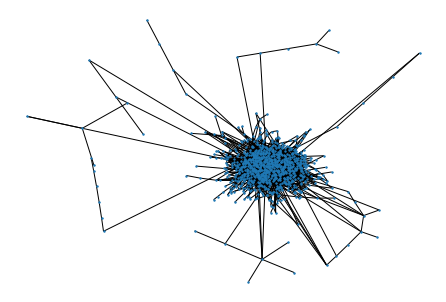

In [62]:
from networkx.algorithms import community


giant = max(nx.connected_components(G), key=len)


#     Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(giant)

communities = community.greedy_modularity_communities(G0)

modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.


# modularity_dict
prin
pos = community_layout(G0,modularity_dict)
print(pos)
nx.draw(G0,node_size=2, pos=pos)  # use spring layout

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test():
    # to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    from community import community_louvain

    g = nx.karate_club_graph()
    partition = community_louvain.best_partition(g)
    pos = community_layout(g, partition)

    nx.draw(g, pos, node_color=list(partition.values())); plt.show()
    return